
### Model 2
Team member names:  Ye Shi, Shiqi Zhang

### To do:  
1. Specify the model number above and indicate the team member names.
- Specify your model structure below. 
- Restart kernel and run all.
- Answer the questions in the next text box.
- Print to pdf.
- Combine the pdfs for the 3 models into a single pdf.
- Submit on gradescope.  


### Questions:  
Give brief (one or two sentence) answers to the questions below.

Q1: What are the pros and cons of this model? 

Answer: Overfitting makes the test accuracy low. However, the training was good.

Q2:  What do you think would be an efficient way to improve accuracy for this model and why?  This is not so much about being right or wrong as about making an informed hypothesis in response to an experiment. 

Answer: Reduce the model complexity, to make the neuron less in the middle layers.



In [0]:
import keras
keras.__version__

'2.2.4'

### Model specification

Define the structure of your model and display it in the next section of code.

In [0]:
from keras import layers
from keras import models

# Model definition
model = models.Sequential()

# Replace with your model:
model.add(layers.Conv2D(64, (3, 3),kernel_initializer='glorot_normal',activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3),kernel_initializer='glorot_normal', activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), kernel_initializer='glorot_normal',activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), kernel_initializer='glorot_normal',activation='relu',padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,kernel_initializer='glorot_normal', activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,kernel_initializer='glorot_normal', activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 256)         295168    
__________

### Prepare the data.  
You don't need to change this section.  

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Compile the model and test before training.   
You don't need to change this section.  

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Untrained accuracty = ' + str(test_acc))


10000/10000 [==============================] - 4s 372us/step
Untrained accuracty = 0.0985


### Train the model.  
You don't need to change this section.    

In [0]:

num_epochs = 10
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=num_epochs, batch_size=64)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 25s 557us/step - loss: 1.4697 - acc: 0.4825 - val_loss: 2.7824 - val_acc: 0.3604
Epoch 2/10
45000/45000 [==============================] - 23s 514us/step - loss: 0.9377 - acc: 0.6759 - val_loss: 1.0106 - val_acc: 0.6544
Epoch 3/10
45000/45000 [==============================] - 23s 511us/step - loss: 0.7202 - acc: 0.7559 - val_loss: 1.3668 - val_acc: 0.5980
Epoch 4/10
45000/45000 [==============================] - 23s 503us/step - loss: 0.5535 - acc: 0.8155 - val_loss: 1.4193 - val_acc: 0.5554
Epoch 5/10
45000/45000 [==============================] - 23s 503us/step - loss: 0.4152 - acc: 0.8622 - val_loss: 1.0691 - val_acc: 0.6586
Epoch 6/10
45000/45000 [==============================] - 23s 502us/step - loss: 0.2979 - acc: 0.9016 - val_loss: 0.7102 - val_acc: 0.7736
Epoch 7/10
45000/45000 [==============================] - 23s 506us/step - loss: 0.2139 - acc: 0.9289 - val_loss: 0.8

### Plot the loss and accuracy as a function of epoch. 
You don't need to change this section.  

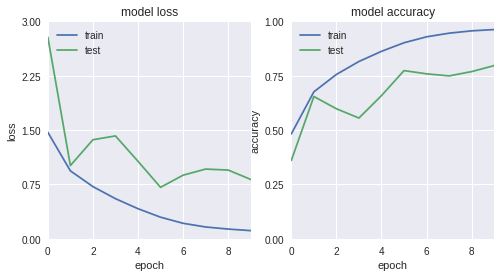

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training(history):
  ncols = 2
  keywords = ['loss', 'acc']
  names = ['loss', 'accuracy']
  fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(8, 4))
 
  for ax, ind, keyword, name in zip(axs.flat, range(ncols), keywords, names):
    ylim = [3, 1][ind]
    data = history.history[keyword]
    ax.plot(data)
    ax.plot(history.history['val_' + keyword])
    ax.set_title('model ' + name)
    ax.set_xlabel('epoch')
    ax.set_ylabel(name)
    ax.set_xlim([0, len(data)-1])
    ax.set_ylim([0, ylim])
    ax.set_xticks(range(0, len(data), 2))
    ax.set_yticks(np.linspace(0, ylim, 5))
    ax.legend(['train', 'test'], loc='upper left')
    
  plt.show()
 
 
plot_training(history)

### Evaluate the trained model on the test data.

You don't need to change this section.  

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy on test images is ' + str(test_acc))

10000/10000 [==============================] - 2s 202us/step
Accuracy on test images is 0.7784
